In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
data=df.copy()
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [3]:
print(f"Dataset shape: {data.shape}")

print("\n Dataset Information: ")
data.info()

Dataset shape: (5110, 12)

 Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
#check for any duplicate data
data.duplicated().sum()

0

In [5]:
print("\n Statistics of Data")
print(data.describe().T)


 Statistics of Data
                    count          mean           std    min        25%  \
id                 5110.0  36517.829354  21161.721625  67.00  17741.250   
age                5110.0     43.226614     22.612647   0.08     25.000   
hypertension       5110.0      0.097456      0.296607   0.00      0.000   
heart_disease      5110.0      0.054012      0.226063   0.00      0.000   
avg_glucose_level  5110.0    106.147677     45.283560  55.12     77.245   
bmi                4909.0     28.893237      7.854067  10.30     23.500   
stroke             5110.0      0.048728      0.215320   0.00      0.000   

                         50%       75%       max  
id                 36932.000  54682.00  72940.00  
age                   45.000     61.00     82.00  
hypertension           0.000      0.00      1.00  
heart_disease          0.000      0.00      1.00  
avg_glucose_level     91.885    114.09    271.74  
bmi                   28.100     33.10     97.60  
stroke               

In [6]:
print("\n missing values per column: ")
missing_values=data.isna().sum()
print(missing_values)


 missing values per column: 
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [7]:
data.dropna(inplace=True)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
# Drop rows where smoking_status is 'Unknown'
data = data.drop(data[data['smoking_status'] == 'Unknown'].index)

# Drop the 'id' column
data = data.drop('id', axis=1)

# Verify the changes
print("Dataset shape after dropping 'Unknown' smoking status and 'id' column:", data.shape)
print("\nUnique values in smoking_status:", data['smoking_status'].unique())

Dataset shape after dropping 'Unknown' smoking status and 'id' column: (3426, 11)

Unique values in smoking_status: ['formerly smoked' 'never smoked' 'smokes']


In [10]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [11]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols)
#categorical columns are encoded using one hot encoding.


Categorical Columns: Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


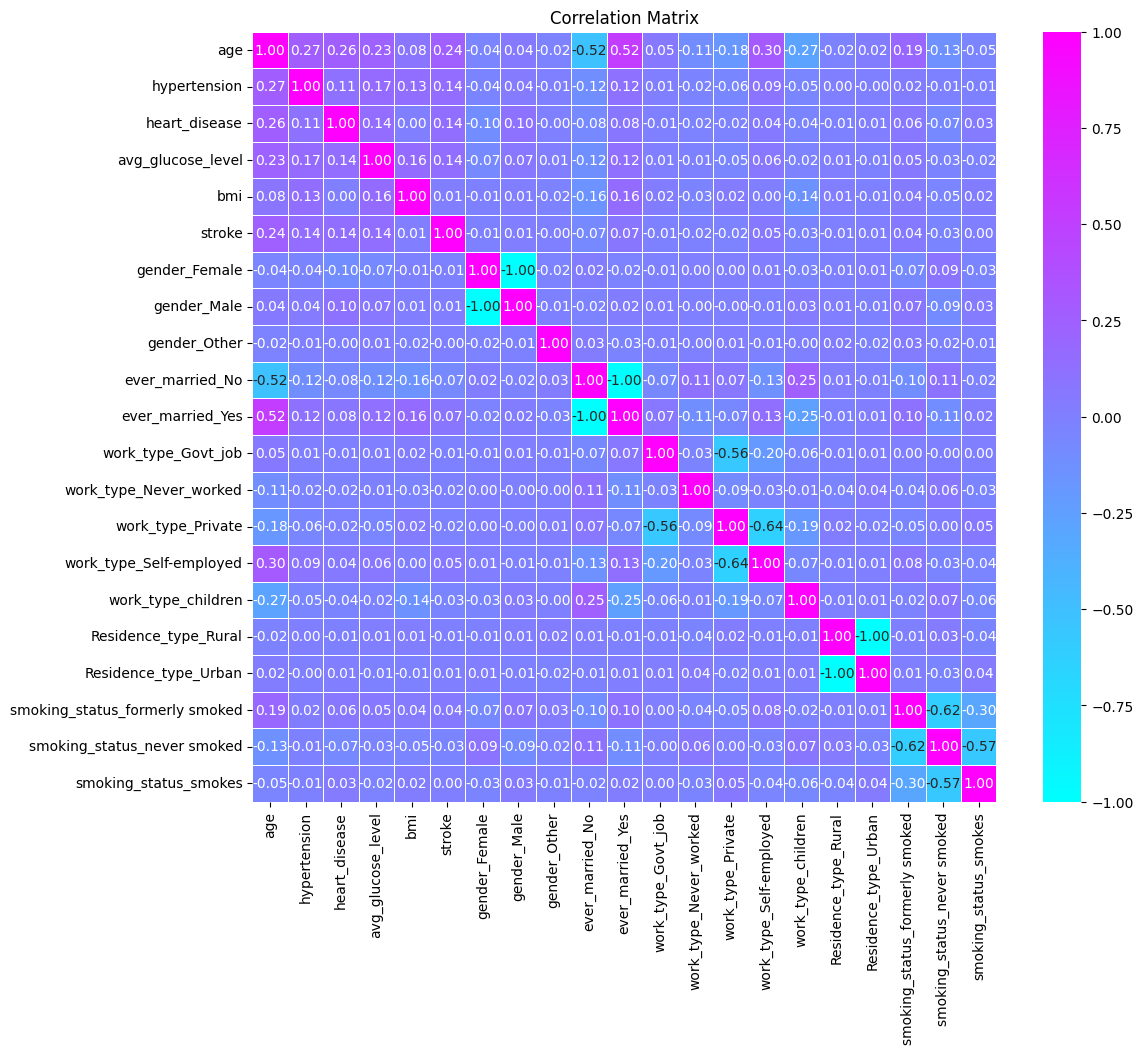

'\n1- strong positive relation\n0- no correlation\n-1- strong negative relation\n'

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=False) #one hot encoding applied. drop_first=false means the first category of the column wont be dropped.

# convert true or false to integer. as integers format is needed to compute the correlation matrix.
data_encoded = data_encoded.astype(int)

# correlation matrix is computed.
correlation_matrix = data_encoded.corr()

# heatmap of correlation matrix is plotted
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='cool', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

"""
1- strong positive relation
0- no correlation
-1- strong negative relation
"""

In [13]:
data_encoded

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
2,80,0,1,105,32,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3,49,0,0,171,34,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,79,1,0,174,24,1,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
5,81,0,0,186,29,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,82,1,0,71,28,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
5102,57,0,0,77,21,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5106,81,0,0,125,40,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
5107,35,0,0,82,30,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0


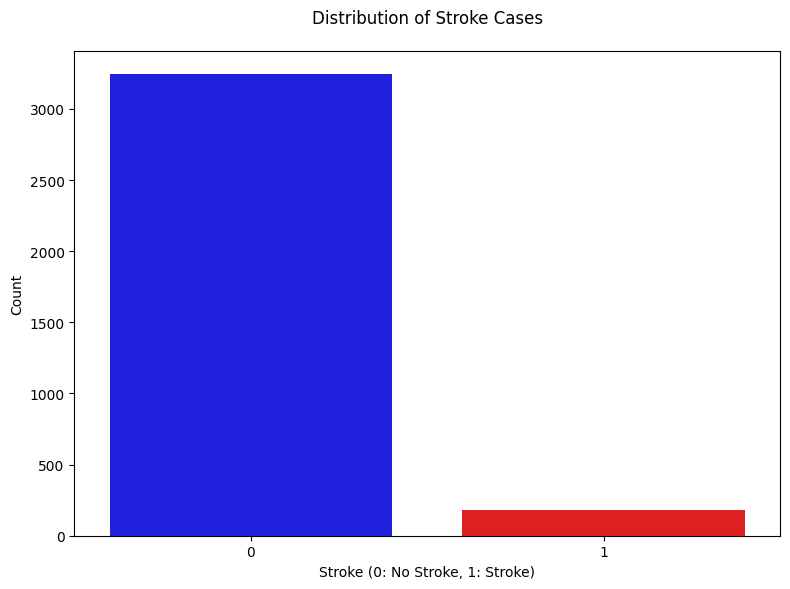

In [14]:
#before balancing data.
plt.figure(figsize=(8, 6)) # 8 inches-width,6-height
sns.countplot(data=data_encoded, x='stroke',hue='stroke', palette=['blue', 'red'],legend=False)
plt.title('Distribution of Stroke Cases', pad=20)
plt.xlabel('Stroke (0: No Stroke, 1: Stroke)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [15]:
from imblearn.over_sampling import SMOTE

X = data_encoded.drop(columns=["stroke"])  # Drop target column
y = data_encoded["stroke"]  # Target column

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.90, random_state=42)  #ensures that minority class reaches 90% to the majority class.
X_balanced, y_balanced = smote.fit_resample(X, y) # creates synthetic samples.

# Check the new class distribution
data_balanced = pd.DataFrame(X_balanced, columns=X.columns)
data_balanced['stroke'] = y_balanced


print("\nBalanced class distribution after SMOTE:")
print(data_balanced['stroke'].value_counts())


Balanced class distribution after SMOTE:
stroke
0    3246
1    2921
Name: count, dtype: int64


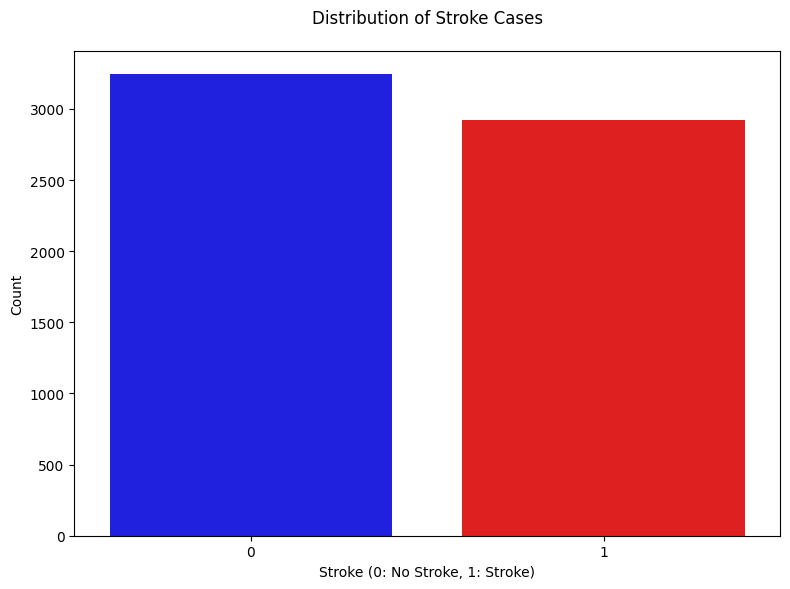

In [16]:
#after balancing with SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(data=data_balanced, x='stroke',hue='stroke', palette=['blue', 'red'],legend=False)
plt.title('Distribution of Stroke Cases', pad=20)
plt.xlabel('Stroke (0: No Stroke, 1: Stroke)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [17]:
data_balanced.shape

(6167, 21)

In [18]:
data_balanced

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67,0,1,228,36,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,1
1,80,0,1,105,32,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1
2,49,0,0,171,34,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,1
3,79,1,0,174,24,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,1
4,81,0,0,186,29,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,71,0,0,131,28,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6163,67,0,0,137,30,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
6164,35,0,0,79,25,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6165,74,0,1,243,26,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data_balanced.drop(columns=['stroke'], axis=1)
y = data_balanced['stroke']

# Normalize Data
numerical_features = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Convert DataFrame to numpy array before reshaping
X_numpy = X.values

n_samples = X_numpy.shape[0]
n_features = X_numpy.shape[1] 

# Create padded array (32 timesteps × 96 features)
X_padded = np.zeros((n_samples, 32, 96))
X_padded[:, :, :n_features] = X_numpy[:, np.newaxis, :] 

# Train-Test Split with reshaped data
X_train, X_val, y_train, y_val = train_test_split(X_padded, y, test_size=0.2, stratify=y, random_state=42)

input_shape = (32, 96)
inputs = Input(shape=input_shape)

# CNN Feature Extraction
x = Conv1D(64, 3, activation='relu', padding='same')(inputs)
x = MaxPooling1D(2)(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Conv1D(128, 3, activation='relu', padding='same')(x)
x = MaxPooling1D(2)(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# LSTM Sequence Processing
x = LSTM(64, return_sequences=True, dropout=0.4, recurrent_dropout=0.3)(x)
x = LSTM(32, dropout=0.3, recurrent_dropout=0.2)(x)

# Classification Head 
x = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC()])

# callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val), 
    epochs=40, 
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)


2025-05-13 13:49:26.612178: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.5287 - auc: 0.5446 - loss: 0.9834 - val_accuracy: 0.5267 - val_auc: 0.8724 - val_loss: 0.9684 - learning_rate: 1.0000e-04
Epoch 2/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.6416 - auc: 0.7006 - loss: 0.7902 - val_accuracy: 0.5997 - val_auc: 0.9228 - val_loss: 0.6838 - learning_rate: 1.0000e-04
Epoch 3/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.7482 - auc: 0.8117 - loss: 0.6374 - val_accuracy: 0.8679 - val_auc: 0.9531 - val_loss: 0.3894 - learning_rate: 1.0000e-04
Epoch 4/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.8094 - auc: 0.8825 - loss: 0.5208 - val_accuracy: 0.9060 - val_auc: 0.9704 - val_loss: 0.3103 - learning_rate: 1.0000e-04
Epoch 5/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8327 - auc: 0.9088 - loss: 0.4676 - val_accuracy: 0.9125 - val_auc: 0.9774 - val_loss: 0.2786 - learning_rate: 1.0000e-04
Epoch 6/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step 

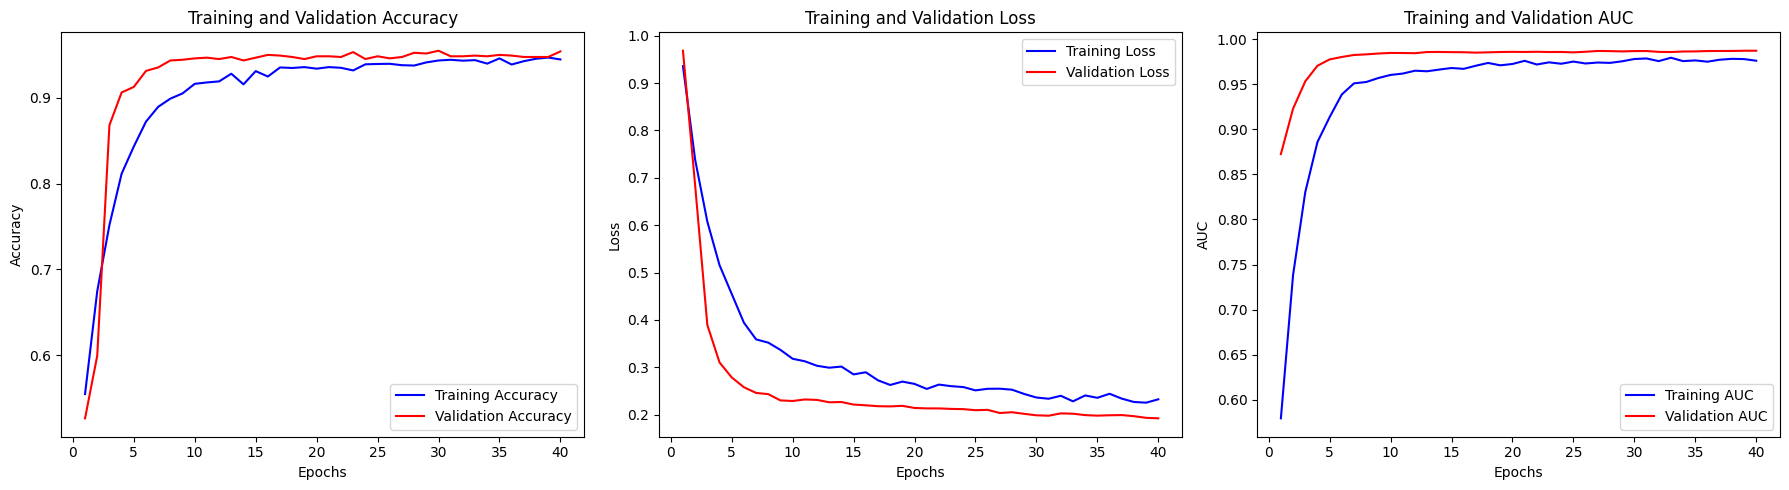

39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step


<Figure size 800x600 with 0 Axes>

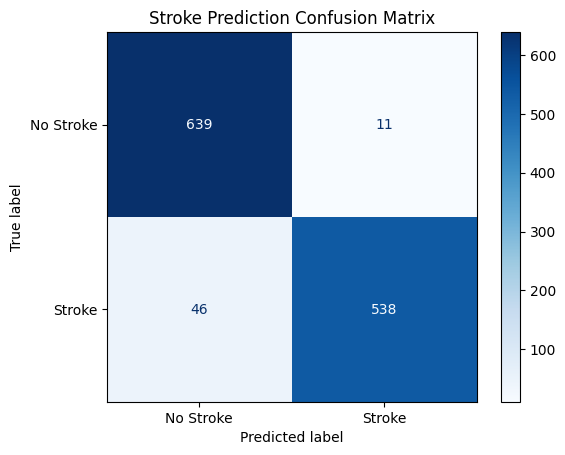

              precision    recall  f1-score   support

   No Stroke       0.93      0.98      0.96       650
      Stroke       0.98      0.92      0.95       584

    accuracy                           0.95      1234
   macro avg       0.96      0.95      0.95      1234
weighted avg       0.96      0.95      0.95      1234



In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
auc = history.history['auc']
val_auc = history.history['val_auc']

epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 3, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot AUC
plt.subplot(1, 3, 3)
plt.plot(epochs, auc, 'b', label='Training AUC')
plt.plot(epochs, val_auc, 'r', label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()

# Generate predictions for confusion matrix
y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()
y_true = y_val.values if isinstance(y_val, pd.Series) else y_val

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])
cmd.plot(cmap=plt.cm.Blues)
plt.title("Stroke Prediction Confusion Matrix")
plt.show()

# Print classification metrics
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=["No Stroke", "Stroke"]))
